In [2]:
from __future__ import print_function
__author__= 'fbb'
import pylab as pl
import numpy as np
import os
from scipy.optimize import curve_fit, minimize
    
import json
s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
PLOT = False
mymu = 100
mydistribs = {}
fig = None
distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']


In [4]:
def gauss(x, *p):
    A, mu, sigma = p
    return A/pi/np.sqrt(sigma)*numpy.exp(-(x-mu)**2/(2.*sigma**2))

In [62]:
def gendistribs(mu, n, md, fig=None):
    md['means']={}
    #print (mu)
    md['pois'] = np.random.poisson(lam=mu, size=n)
    md['gaus'] = np.random.randn(n)+mu
    md['chisq'] = np.random.chisquare(mu, size=n)
    md['lnorm'] = np.random.lognormal(mean=np.log(mu)-0.5, size=n)
    md['binomial'] = np.random.binomial(mu*10, 0.1, size=n)
    md['cauchy'] = np.random.gamma(1,100,n)

    for dist in distributions:
        md['means'][dist]=md[dist].mean()
        
    if fig:
        ax=fig.add_subplot(231)
        ax.hist(md['pois'], label = 'pois %d'%n)
        ax.legend()
        ax=fig.add_subplot(232)
        ax.hist(md['gaus'], label = 'gaus %d'%n)
        ax.legend()
        ax=fig.add_subplot(233)
        ax.hist(md['chisq'], label = 'chisq %d'%n)
        ax.legend()
        ax=fig.add_subplot(234)
        ax.hist(md['lnorm'], label = 'lnorm %d'%n)
        ax.legend()
        ax=fig.add_subplot(235)
        ax.hist(md['binomial'], label = 'binomial %d'%n)
        ax.legend()
        ax=fig.add_subplot(236)
        #ax.hist(md['pareto'], label = 'pareto %d'%n)
        ax.hist(md['cauchy'], label = 'caucy %d'%n)
        ax.legend()
          


In [63]:
def fitfunction(x, y):
    p0 = [1., 100., 1.]
    coeff, var_matrix = curve_fit(gauss, x, y, p0=p0)
    return coeff


In [64]:
def alldistribs(Nsize,ax):
    mydistribs={}
    for i,n in enumerate([Nsize]*10):#10,30,60,100,300,600,1000,3000,6000,10000]):
        if PLOT: fig=pl.figure(figsize = (10,10))
        mydistribs[i]={'n':n}
        gendistribs(mymu, n, mydistribs[i], fig=None)
        #print (mydistribs[i]['means'])

    means = []
    
    for k in mydistribs.iterkeys():
        for j in mydistribs[k]['means'].iterkeys():
            means.append(mydistribs[k]['means'][j])
            ax[j].plot(mydistribs[k]['n'],mydistribs[k]['means'][j],'o')
            #print (mydistribs[k]['n'], len(mydistribs[k][j]))
    #allmeans=[means[j] for j in mydistribs[:]['means']]
    h, bin_edges, patches= pl.hist(means, bins=30, normed=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    return means, h, bin_centers


Fitted mean = 100.000000
Fitted standard deviation = 1.000000
Fitted mean = 100.000000
Fitted standard deviation = 1.000000
Fitted mean = 100.000000
Fitted standard deviation = 1.000000
Fitted mean = 100.000000
Fitted standard deviation = 1.000000
Fitted mean = 100.000000
Fitted standard deviation = 1.000000
Fitted mean = 100.000000
Fitted standard deviation = 1.000000
Fitted mean = 100.000000
Fitted standard deviation = 1.000000


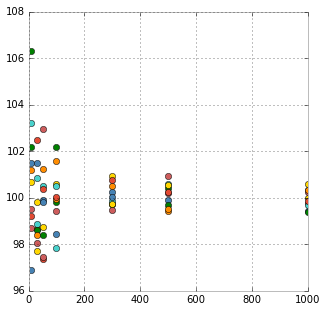

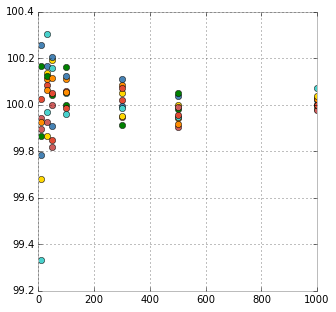

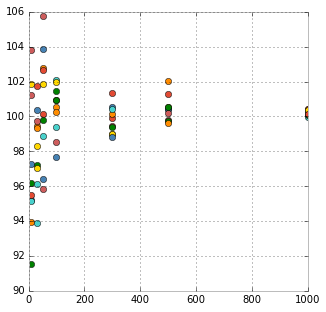

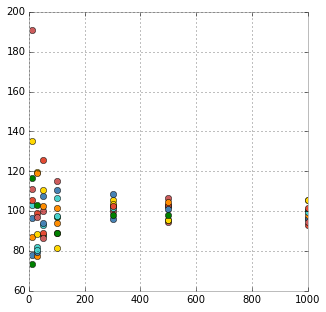

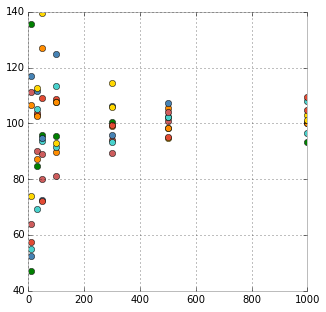

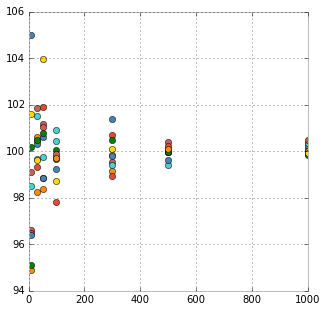

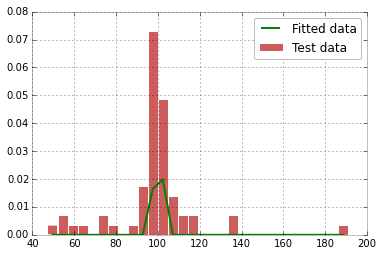

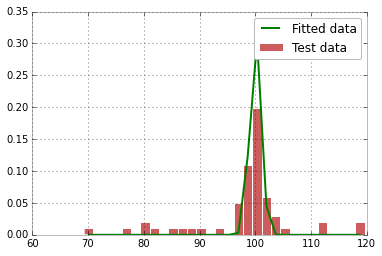

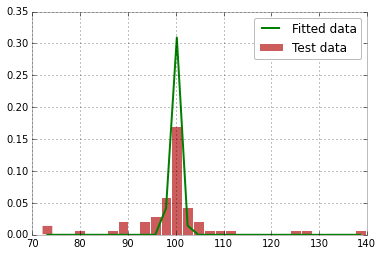

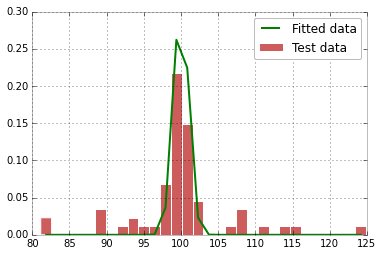

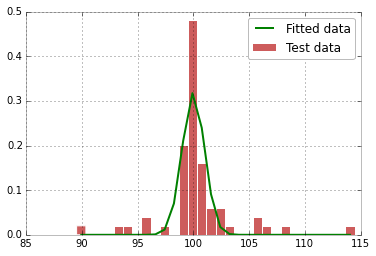

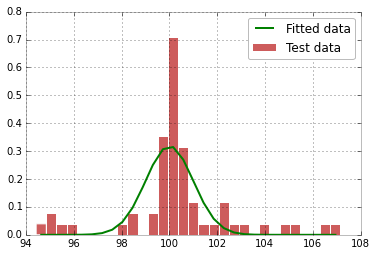

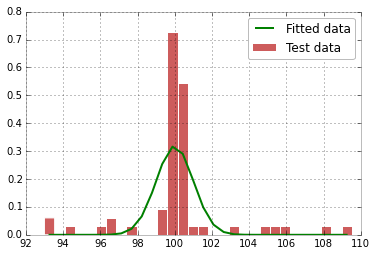

In [65]:
ax={}
for d in distributions:
    fig=pl.figure(figsize=(5,5))
    ax[d]=fig.add_subplot(111)

for nsize in [10,30,50,100,300,500,1000]:
    pl.figure()
    all_means, hist, bin_centers = alldistribs(nsize, ax)
    #for k in mydistribs.iterkeys():
    #for d in distributions: ax[d].plot(nsize,all_means'][j],'o')
    coeffs = fitfunction(hist, bin_centers)
    pl.hist(all_means, bins=30, normed=True, label='Test data')
    pl.plot(bin_centers, gauss(bin_centers, *coeffs), label='Fitted data')
    pl.legend()
    # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
    print ('Fitted mean = %f'%coeffs[1])
    print ('Fitted standard deviation = %f'%coeffs[2])
